In [1]:
import pandas as pd
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [63]:
data_file = '../data/winequality-white.csv'
headerList = ['고정산도', '휘발성산도', '시트르산', '잔류당분', '염화물', '자유이산화황', '총이산화황', '밀도', 'pH', '황산염', '알콜', '품질']
wineDF = pd.read_csv(data_file, sep=';')
wineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [51]:
featureDF = wineDF[[wineDF.columns[0], wineDF.columns[1]]]
featureDF

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23
...,...,...
4893,6.2,0.21
4894,6.6,0.32
4895,6.5,0.24
4896,5.5,0.29


In [64]:
targetDF = wineDF['quality']
targetDF

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size=0.2,
                                                    stratify = targetDF
                                                    )

In [78]:
### 검증용 데이터셋 준비 - 학습용 데이터셋에서 분리
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                              y_train, 
                                              test_size=0.2, 
                                              stratify=y_train
                                              )


In [79]:
# print(f'학습용 데이터셋 ------>\n{X_train.shape}, {y_train.shape}')
# print(f'학습용 데이터셋 ------>\n{y_train.value_counts()/y_train.shape[0]}')
# 
# print(f'테스트용 데이터셋 ------>\n{X_test.shape}, {y_test.shape}')
# print(f'테스트용 데이터셋 ------>\n{y_test.value_counts()/y_test.shape}')
# 


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train) # 검증이나 데이터에 사용할 때 새 변수명 부여해서 반복 사용
scaled_X_test = scaler.transform(X_test)


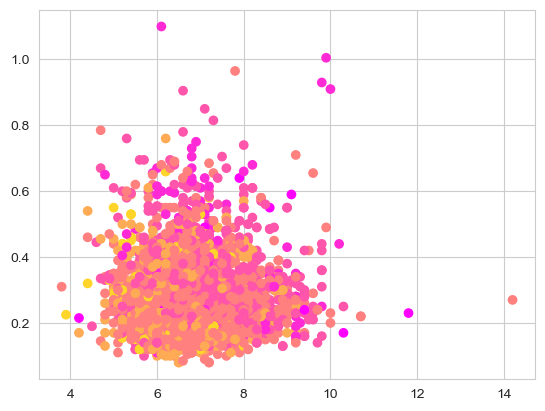

In [122]:
import matplotlib.pyplot as plt
plt.scatter(featureDF['fixed acidity'], featureDF['volatile acidity'], c=targetDF, cmap='spring')

TypeError: 'tuple' object is not callable

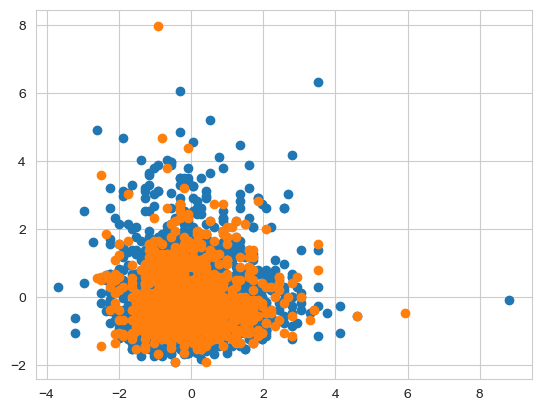

In [120]:
plt.scatter(scaled_X_train[:,0], scaled_X_train[:,1])
plt.scatter(scaled_X_test[:,0], scaled_X_test[:,1])
plt.xlim(-10,10)
plt.ylim(-8,8)

In [95]:
max_k = scaled_X_train.shape[0]
max_k


2507

In [125]:
test_scoreList = []
train_scoreList = []
for k in range(1,100):
    wineModel = KNeighborsClassifier(n_neighbors=k)
    wineModel.fit(scaled_X_train, y_train)
    train_scoreList.append(wineModel.score(scaled_X_train,y_train))
    test_scoreList.append(wineModel.score(scaled_X_test,y_test))

In [126]:
# test_scoreList, train_scoreList

([0.3989795918367347,
  0.3989795918367347,
  0.4153061224489796,
  0.42857142857142855,
  0.42551020408163265,
  0.4377551020408163,
  0.43979591836734694,
  0.44693877551020406,
  0.43673469387755104,
  0.4459183673469388,
  0.4489795918367347,
  0.45918367346938777,
  0.42244897959183675,
  0.4377551020408163,
  0.4418367346938776,
  0.45816326530612245,
  0.45408163265306123,
  0.44387755102040816,
  0.4418367346938776,
  0.4336734693877551,
  0.43673469387755104,
  0.44387755102040816,
  0.4316326530612245,
  0.4387755102040816,
  0.4275510204081633,
  0.44081632653061226,
  0.4336734693877551,
  0.4346938775510204,
  0.43673469387755104,
  0.44081632653061226,
  0.4448979591836735,
  0.43979591836734694,
  0.4387755102040816,
  0.4346938775510204,
  0.43979591836734694,
  0.4346938775510204,
  0.4489795918367347,
  0.4479591836734694,
  0.43673469387755104,
  0.44081632653061226,
  0.44285714285714284,
  0.44387755102040816,
  0.43979591836734694,
  0.44285714285714284,
  0.45,
 

TypeError: title() missing 1 required positional argument: 'label'

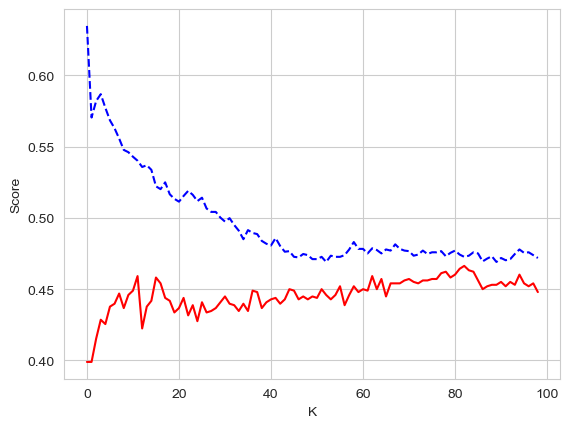

In [127]:
plt.plot(train_scoreList, 'b--')
plt.plot(test_scoreList, 'r-')
# plt.title("K & Score")
plt.xlabel('K')
plt.ylabel('Score')
plt.title()

In [128]:
test_scoreList.index(max(test_scoreList))

82

In [129]:
winemodel = KNeighborsClassifier(n_neighbors=1)
winemodel.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [130]:
winemodel.score(scaled_X_test, y_test)

0.3989795918367347